## Havriliak Negami function

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cmath
from scipy.signal import chirp, find_peaks, peak_widths
%matplotlib inline

In [2]:
# We define the Havriliak Negami function parameters
pi=np.pi
tauHN=0.001
deps = 1.0
b = 0.5
c = 1.0
einf = 3.0
freqs = np.logspace(-3,9,14000)
omega=2*np.pi*freqs
estar=einf + deps*(1+(1j*omega*tauHN)**b)**-c

## Apex derivative capacitance

In [3]:
e0=8.85E-12
R=20E-9
theta0=18*pi/180
h=150E-9

In [4]:
# We define the Derivative of the Capacitance for the apex
def CAPDER(e0,R,theta0,h,z):
    der=-2*pi*e0*(R**2)*(estar**2*(1-np.sin(theta0))/((h+estar*z)*(estar*R*(1-np.sin(theta0))+h+estar*z)))
    return der

In [5]:
#z=20nm
f20= CAPDER(8.85E-12,20E-9,18*pi/180,150E-9,20E-9)

## Cantilever derivative capacitance

In [6]:
# We define the Cantilever parameters
e0=8.85E-12
W=30E-6
alpha=15*pi/180
L=125E-6
h=150E-9
T=15E-6
A=L*W
f=2

In [7]:
# We define the derivative of the Cantilever function
def DERCANT(W,L,h,T,z):
    gamma=(L*np.sin(alpha)/(T+z))+1
    AA = W*e0*gamma*(T+z)**2
    BB = (f*np.tan(alpha)/(W*e0*np.log(gamma)))+(h/(L*W*e0*estar))
    CC = np.log(gamma)
    dercantilever=-f*L*np.sin(alpha)*np.tan(alpha)/(AA*gamma*BB*BB*CC*CC)
    return dercantilever

In [8]:
#z=20nm
g20= DERCANT(30E-6,125E-6,150E-9,15E-6,20E-9)

## Phase 

$$
\tan^{-1}[\frac{\Im(\frac{\partial C^{*}_{\text{APEX}}}{\partial z})+\Im(\frac{\partial C^{*}_{\text{CANTILEVER}}}{\partial z})}{\Re(\frac{\partial C^{*}_{\text{APEX}}}{\partial z})+\Re(\frac{\partial C^{*}_{\text{CANTILEVER}}}{\partial z})}]
$$

184.78295349841636
1.3053604774431646


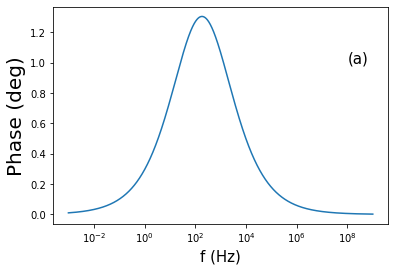

In [9]:
#Plot delta phase for the given values
plt.semilogx(freqs,np.arctan((f20.imag+g20.imag)/(-f20.real-g20.real))*180/pi)
plt.xlabel("f (Hz)", fontsize=15)
plt.ylabel("Phase (deg)", fontsize=20)
max_x = freqs[((f20.imag+g20.imag)/(-f20.real-g20.real)).argmax()]  # Find the x value corresponding to the maximum y value
print (max_x)
print (max(np.arctan((f20.imag+g20.imag)/(-f20.real-g20.real))*180/pi))
#print (freqs,(np.arctan((f20.imag+g20.imag)/(-f20.real-g20.real))*180/pi))
plt.text(1E8, 1, r'(a)', fontsize=15)

fig = plt.gcf()
fig.savefig('phase1.png', dpi=100)
fig.set_size_inches(6, 4)


## Phase as a function of z

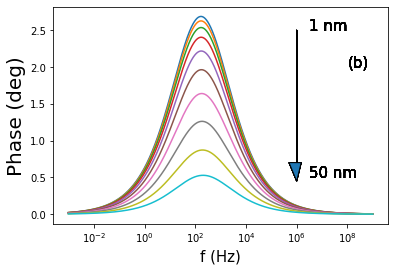

In [20]:
#PHASE AS A FUNCTION OF Z

z_range = np.logspace(0,1.7,10) #z in nanometers
R = 20E-9
h = 150E-9

for z in z_range:
    z = z*1E-9 #z in meters

    
    #Plot delta phase for all z values
    der=CAPDER(e0,R,theta0,h,z)
    dercantilever=DERCANT(W,L,h,T,z)
    phase= np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi
    max_x = freqs[((der.imag+dercantilever.imag)/(-der.real-dercantilever.real)).argmax()]  # Find the x value corresponding to the maximum y value
    #print (max_x)
    #print(max(np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi))
    plt.semilogx(freqs,phase)
    plt.xlabel("f (Hz)", fontsize=15)
    plt.ylabel("Phase (deg)", fontsize=20)
    plt.arrow(1E6, 2.5, 0, -1.8, head_width = 1E6, head_length = 0.25) 
    plt.text(1E8, 2, r'(b)', fontsize=15)
    plt.text(3E6, 2.5, r'1 nm', fontsize=15)
    plt.text(3E6, 0.5, r'50 nm', fontsize=15)
    
    fig = plt.gcf()
    fig.savefig('phase2.png', dpi=100)
    fig.set_size_inches(6, 4)


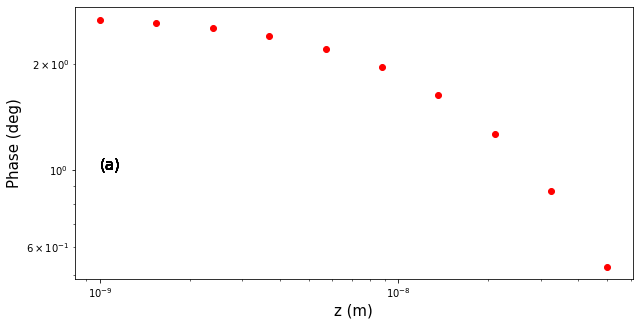

In [11]:
#PHASE AS A FUNCTION OF Z

z_range = np.logspace(0,1.7,10) #z in nanometers
R = 20E-9
h = 150E-9

for z in z_range:
    z = z*1E-9 #z in meters

    
    #Plot delta phase for all z values
    der=CAPDER(e0,R,theta0,h,z)
    dercantilever=DERCANT(W,L,h,T,z)
    phase= np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi
    max_x = freqs[((der.imag+dercantilever.imag)/(-der.real-dercantilever.real)).argmax()]  # Find the x value corresponding to the maximum y value
    #print (max_x)
    #print(max(np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi))
    #print (freqs,(np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi))
    plt.loglog(z,max(np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi),'ro')
    plt.xlabel("z (m)", fontsize=15)
    plt.ylabel("Phase (deg)", fontsize=15)
    plt.text(1E-9, 1, r'(a)', fontsize=15)
    
    fig = plt.gcf()
    fig.savefig('za.png', dpi=100)
    fig.set_size_inches(10, 5)

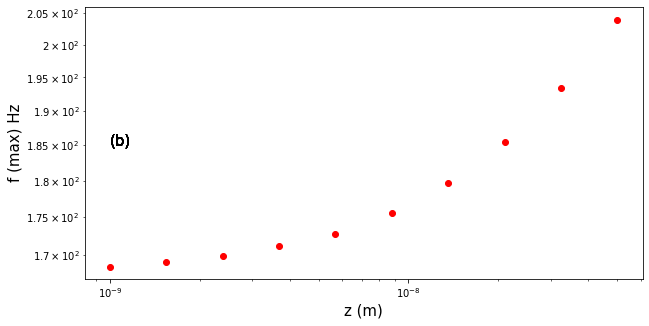

In [12]:
#freq AS A FUNCTION OF Z

z_range = np.logspace(0,1.7,10) #z in nanometers
R = 20E-9
h = 150E-9

for z in z_range:
    z = z*1E-9 #z in meters

    
    #Plot delta phase for all z values
    der=CAPDER(e0,R,theta0,h,z)
    dercantilever=DERCANT(W,L,h,T,z)
    phase= np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi
    #plt.semilogx(freqs,phase)
    plt.xlabel("f (Hz)")
    plt.ylabel("Phase (deg)")
    max_x = freqs[((der.imag+dercantilever.imag)/(-der.real-dercantilever.real)).argmax()]  # Find the x value corresponding to the maximum y value
    #print (max_x)
    #print(max(np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi))
    #print (freqs,(np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi))
    plt.loglog(z,max_x,'ro')
    plt.xlabel("z (m)",fontsize=15)
    plt.ylabel("f (max) Hz", fontsize=15)
    plt.text(1E-9, 1.85E2, r'(b)', fontsize=15)
    
    fig = plt.gcf()
    fig.savefig('zb.png', dpi=100)
    fig.set_size_inches(10, 5)

In [13]:
#FWHM as a function of z

z_range = np.logspace(0,1.7,10) #z in nanometers
R = 20E-9
h = 150E-9

for z in z_range:
    z = z*1E-9 #z in meters

    
    #Plot delta phase for all z values
    der=CAPDER(e0,R,theta0,h,z)
    dercantilever=DERCANT(W,L,h,T,z)
    phase= np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi
    max_x = freqs[((der.imag+dercantilever.imag)/(-der.real-dercantilever.real)).argmax()]  # Find the x value corresponding to the maximum y value
    
    x=phase
    peaks, _ = find_peaks(x)
    results_half = peak_widths(x, peaks, rel_height=0.5)
    results_half[0]  # widths
    #plt.plot(x)
    #plt.plot(peaks, x[peaks], "x")
    #plt.hlines(*results_half[1:], color="C2")
    #plt.show()
    
    print(z)
    print(results_half[1:])
    
    #print (max_x)
    #print(max(np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi))
    #plt.semilogx(freqs,phase)
    #plt.xlabel("f (Hz)")
    #plt.ylabel("Phase (deg)")

1e-09
(array([1.35418745]), array([4438.79403626]), array([7753.86378791]))
1.5448591479026758e-09
(array([1.32362218]), array([4440.31648251]), array([7755.56126263]))
2.386589786858581e-09
(array([1.27810833]), array([4442.62957625]), array([7758.14336873]))
3.6869450645195754e-09
(array([1.21163828]), array([4446.1150953]), array([7762.0413823]))
5.695810810737687e-09
(array([1.11735784]), array([4451.3077782]), array([7767.85982321]))
8.79922543569107e-09
(array([0.98930549]), array([4458.92364319]), array([7776.40675821]))
1.3593563908785256e-08
(array([0.82602859]), array([4469.86161019]), array([7788.68075203]))
2.1000141557086556e-08
(array([0.63566792]), array([4485.12944873]), array([7805.75191403]))
3.24422607917163e-08
(array([0.43923082]), array([4505.5870854]), array([7828.42988906]))
5.011872336272723e-08
(array([0.26601545]), array([4531.38752914]), array([7856.65153689]))


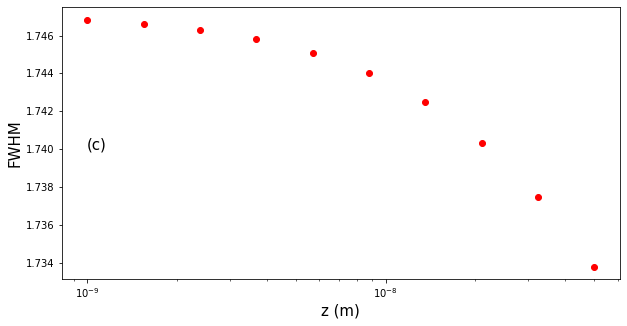

In [14]:
plt.semilogx([1e-09, 1.5448e-09, 2.3865e-09, 3.6869e-09, 5.6958e-09, 8.7992e-09, 13.5935e-09, 21.0001e-09, 32.4422e-09, 50.1187e-09], [1.7468401823, 1.746623533, 1.746295350, 1.74580307, 1.74507363, 1.744009851, 1.74248812, 1.740362681, 1.737493858, 1.733829095],'ro')
plt.xlabel("z (m)", fontsize=15)
plt.ylabel("FWHM", fontsize=15)
plt.text(1E-9, 1.74, r'(c)', fontsize=15)

fig = plt.gcf()
fig.savefig('zc.png', dpi=100)
fig.set_size_inches(10, 5)


## Phase as a function of h

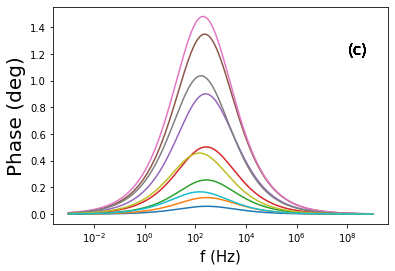

In [15]:
#PHASE AS A FUNCTION OF h

h_range = np.logspace(0,3,10) #h in nanometers
R = 20E-9
z = 20E-9

for h in h_range:
    h = h*1E-9 #z in meters

    
    #Plot delta phase for all z values
    der=CAPDER(e0,R,theta0,h,z)
    dercantilever=DERCANT(W,L,h,T,z)
    phase= np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi
    plt.semilogx(freqs,phase)
    plt.xlabel("f (Hz)", fontsize=15)
    plt.ylabel("Phase (deg)", fontsize=20)
    max_x = freqs[((der.imag+dercantilever.imag)/(-der.real-dercantilever.real)).argmax()]  # Find the x value corresponding to the maximum y value
    #print (max_x)
    #print(max(np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi))
    #print (freqs,(np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi))
    plt.text(1E8, 1.2, r'(c)', fontsize=15)
    
    fig = plt.gcf()
    fig.savefig('phase3.png', dpi=100)
    fig.set_size_inches(6, 4)

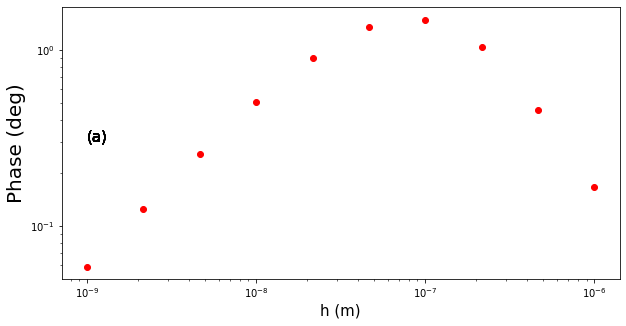

In [16]:
#PHASE AS A FUNCTION OF h

h_range = np.logspace(0,3,10) #h in nanometers
R = 20E-9
z = 20E-9

for h in h_range:
    h = h*1E-9 #z in meters

    
    #Plot delta phase for all z values
    der=CAPDER(e0,R,theta0,h,z)
    dercantilever=DERCANT(W,L,h,T,z)
    phase= np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi
    #plt.semilogx(freqs,phase)
    plt.xlabel("f (Hz)")
    plt.ylabel("Phase (deg)")
    max_x = freqs[((der.imag+dercantilever.imag)/(-der.real-dercantilever.real)).argmax()]  # Find the x value corresponding to the maximum y value
    #print (max_x)
    #print(max(np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi))
    #print (freqs,(np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi))
    plt.loglog(h,max(np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi),'ro')
    plt.xlabel("h (m)", fontsize=15)
    plt.ylabel("Phase (deg)",fontsize=20)
    
    plt.text(1E-9, 0.3, r'(a)', fontsize=15)
    
    fig = plt.gcf()
    fig.savefig('ha.png', dpi=100)
    fig.set_size_inches(10, 5)

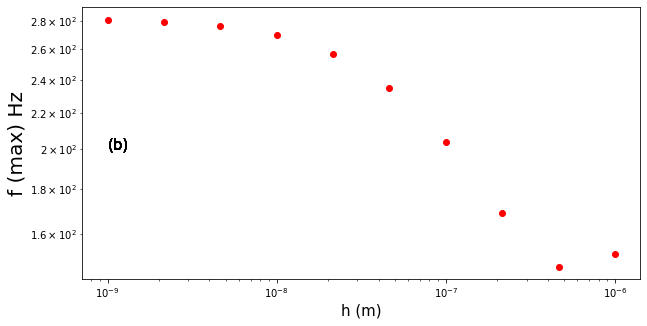

In [17]:
#freq AS A FUNCTION OF h

h_range = np.logspace(0,3,10) #h in nanometers
R = 20E-9
z = 20E-9

for h in h_range:
    h = h*1E-9 #z in meters

    
    #Plot delta phase for all z values
    der=CAPDER(e0,R,theta0,h,z)
    dercantilever=DERCANT(W,L,h,T,z)
    phase= np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi
    #plt.semilogx(freqs,phase)
    plt.xlabel("f (Hz)")
    plt.ylabel("Phase (deg)")
    max_x = freqs[((der.imag+dercantilever.imag)/(-der.real-dercantilever.real)).argmax()]  # Find the x value corresponding to the maximum y value
    #print (max_x)
    #print(max(np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi))
    #print (freqs,(np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi))
    plt.loglog(h,max_x,'ro')
    plt.xlabel("h (m)", fontsize=15)
    plt.ylabel("f (max) Hz", fontsize=20)
    
    plt.text(1E-9, 2E2, r'(b)', fontsize=15)
    
    fig = plt.gcf()
    fig.savefig('hb.png', dpi=100)
    fig.set_size_inches(10, 5)

In [18]:
#FWHM AS A FUNCTION OF h

h_range = np.logspace(0,3,10) #h in nanometers
R = 20E-9
z = 20E-9

for h in h_range:
    h = h*1E-9 #z in meters

    
    #Plot delta phase for all z values
    der=CAPDER(e0,R,theta0,h,z)
    dercantilever=DERCANT(W,L,h,T,z)
    phase= np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi
    #plt.semilogx(freqs,phase)
    #plt.xlabel("f (Hz)")
    #plt.ylabel("Phase (deg)")
    max_x = freqs[((der.imag+dercantilever.imag)/(-der.real-dercantilever.real)).argmax()]  # Find the x value corresponding to the maximum y value
    
    x=phase
    peaks, _ = find_peaks(x)
    results_half = peak_widths(x, peaks, rel_height=0.5)
    results_half[0]  # widths
    #plt.plot(x)
    #plt.plot(peaks, x[peaks], "x")
    #plt.hlines(*results_half[1:], color="C2")
    #plt.show()
    
    print(h)
    print(results_half[1:])
    
    
    #print (max_x)
    #print(max(np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi))
    #print (freqs,(np.arctan((der.imag+dercantilever.imag)/(-der.real-dercantilever.real))*180/pi))

1e-09
(array([0.02959592]), array([4691.1203592]), array([8023.45319288]))
2.154434690031884e-09
(array([0.06247462]), array([4688.22444687]), array([8020.50525146]))
4.641588833612779e-09
(array([0.12888621]), array([4682.15069736]), array([8014.31698619]))
1e-08
(array([0.25356296]), array([4669.74728387]), array([8001.64970303]))
2.1544346900318832e-08
(array([0.45375565]), array([4645.56007196]), array([7976.78065767]))
4.6415888336127774e-08
(array([0.67917582]), array([4601.58911071]), array([7930.84722904]))
1.0000000000000001e-07
(array([0.74628556]), array([4530.33100034]), array([7854.6444269]))
2.1544346900318824e-07
(array([0.52257067]), array([4440.14104558]), array([7756.97316072]))
4.641588833612778e-07
(array([0.23075717]), array([4369.56815353]), array([7683.6884003]))
1.0000000000000002e-06
(array([0.08434003]), array([4376.31655443]), array([7714.40693385]))


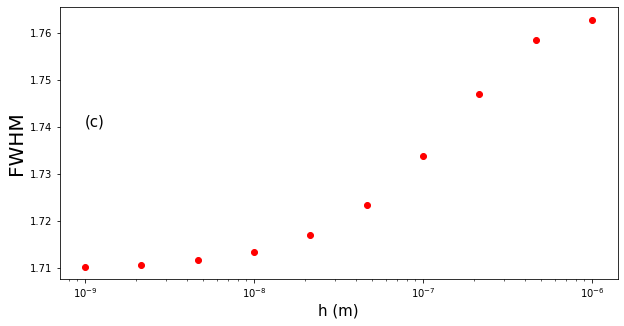

In [19]:
plt.semilogx([1e-09, 2.154434690031884e-09, 4.641588833612779e-09, 1e-08, 2.1544346900318832e-08, 4.6415888336127774e-08, 1.0000000000000001e-07, 2.1544346900318824e-07, 4.641588833612778e-07, 1.0000000000000002e-06], [1.710349038, 1.710776722, 1.711674293, 1.71350808, 1.717076205, 1.723501825, 1.733790407, 1.74701053, 1.75845487, 1.762762551],'ro')
plt.xlabel("h (m)", fontsize=15)
plt.ylabel("FWHM", fontsize=20)
plt.text(1E-9, 1.74, r'(c)', fontsize=15)
    
fig = plt.gcf()
fig.savefig('hc.png', dpi=100)
fig.set_size_inches(10, 5)

